# <한국 복지 패널 데이터를 활용한 한국인의 삶 분석>

## 수집처
* 한국보건사회연구원(국무총리실 산하 국책 연구기관)
* 정부 승인 지정통계 조사(승인번호 제 33109호)

## 조사 목적
* 빈곤층 및 차상위층의 가구형태, 소득수준, 취업상태 관련 실태변화를 파악하여 정책지원에 기여

## 수집 방법
* 조사원 직접 가구 방문, 질의 답변
* 모든 가구원 대상 수집

## 가구 추적 조사
* 2006 ~ 2019년
* 약 5000가구, 15000명

---
### 변수 - 1,000여개
1. 가구원 배경 및 개인사
    * 가구원 수, 교육수준, 혼인상태, 가구형태(단독, 모부자, 소년소녀가장)
 
 
2. 가구여건 및 복지욕구
    * 보육 , 교육, 건강, 의료, 주거여건(주택유형, 주거위치, 주거점유형태)
 
 
3. 사회복지 가입 및 수급여부
    * 사회보험, 의료보험, 공공부조, 사회복지 서비스(기초보장 수급 형태)
 
 
4. 경제 상황 : 소득, 지출, 저축, 자산, 부채


5. 근로 : 직업 이력, 경제 활동 참여 상태, 일자리 특성(고용 형태, 근로시간 형태, 업종, 직종)

---
## 분석 목표
* 분석1 : 성별에 따른 소득
* 분석2 : 나이와 소득의 관계
* 분석3 : 연령대에 따른 소득
* 분석4 : 연령대 및 성별에 따른 소득

In [1]:
install.packages("foreign")

Installing package into 'C:/Users/gram/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gram\AppData\Local\Temp\RtmpGCftKP\downloaded_packages


In [2]:
library(foreign)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# 복지패널데이터 로드
raw_welfare <- read.spss("data_spss_Koweps2014.sav", to.data.frame = T)
# 데이터 copy
welfare <- raw_welfare

Warning message in read.spss("data_spss_Koweps2014.sav", to.data.frame = T):
"data_spss_Koweps2014.sav: Compression bias (0) is not the usual value of 100"


### 데이터 검토

In [4]:
dim(welfare)

[1] 7048 1081

In [5]:
str(welfare)

'data.frame':	7048 obs. of  1081 variables:
 $ h09_id      : num  1 2 3 4 6 7 8 10 12 14 ...
 $ h09_ind     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h09_sn      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h09_merkey  : num  10101 20101 30101 40101 60101 ...
 $ h_new       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h09_cobf    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h09_ws      : num  0.372 0.517 0.607 0.357 0.465 ...
 $ h09_wg      : num  962 1337 1569 922 1202 ...
 $ h09_reg5    : num  1 1 1 1 1 4 1 1 1 1 ...
 $ h09_reg7    : num  1 1 1 1 1 7 1 1 1 1 ...
 $ h09_din     : num  2172 1675 1523 3842 3983 ...
 $ h09_cin     : num  2208 2023 1571 3878 4079 ...
 $ h09_flag    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h09_hc      : num  1 1 1 1 1 2 2 2 2 2 ...
 $ nh0901_1    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh0901_2    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h0901_1     : num  1 1 1 2 5 3 1 2 2 1 ...
 $ h09_pind1   : num  1 1 1 1 1 8 1 1 1 1 ...
 $ h09_pid1    : num  101 201 301 401 601 ...
 $ h0901_2     :

In [6]:
head(welfare)

,h09_id,h09_ind,h09_sn,h09_merkey,h_new,h09_cobf,h09_ws,h09_wg,h09_reg5,h09_reg7,...,h0916_56,h0916_60,h0916_64,h0917_1,h0917_2,h0917_3,h0917_4,h0917_5,h0917_6,h0917_7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,0.3722699,961.6440,1,1,...,NA,NA,NA,7,4,4,3,2,3,2
2,2,1,1,20101,0,NA,0.5174442,1336.6571,1,1,...,NA,NA,NA,0,NA,3,1,4,2,1
3,3,1,1,30101,0,NA,0.6073695,1568.9513,1,1,...,NA,NA,NA,0,NA,2,1,1,1,1
4,4,1,1,40101,0,NA,0.3568641,921.8481,1,1,...,NA,NA,NA,0,NA,2,1,2,2,1
5,6,1,1,60101,0,NA,0.4652189,1201.7490,1,1,...,NA,NA,NA,0,NA,4,1,3,3,1
6,7,1,1,70101,0,NA,0.2478946,640.3591,4,7,...,NA,NA,NA,0,NA,1,1,4,1,1


In [7]:
summary(welfare)

     h09_id        h09_ind          h09_sn        h09_merkey      
 Min.   :   1   Min.   :1.000   Min.   :1.000   Min.   :   10101  
 1st Qu.:2492   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:24917601  
 Median :4826   Median :1.000   Median :1.000   Median :48255101  
 Mean   :4883   Mean   :2.724   Mean   :1.003   Mean   :48827568  
 3rd Qu.:6884   3rd Qu.:7.000   3rd Qu.:1.000   3rd Qu.:68842601  
 Max.   :9800   Max.   :9.000   Max.   :9.000   Max.   :98000701  
                                                                  
     h_new           h09_cobf         h09_ws            h09_wg        
 Min.   :0.0000   Min.   :1.000   Min.   :0.01938   Min.   :   50.08  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:0.34825   1st Qu.:  899.61  
 Median :0.0000   Median :2.000   Median :0.69238   Median : 1788.54  
 Mean   :0.2284   Mean   :3.068   Mean   :1.00000   Mean   : 2583.19  
 3rd Qu.:0.0000   3rd Qu.:6.500   3rd Qu.:1.39884   3rd Qu.: 3613.48  
 Max.   :1.0000   Max.   :7.000   Max.

### 변수명 변경

In [9]:
welfare <- rename(welfare, 
                  sex = h0901_4,     # 성별
                  birth = h0901_5,   # 태어난 연도
                  income = h09_din)  # 소득

---
## 분석1 : 성별에 따른 소득

절차

1. 변수 검토 및 정제 - 성별
    * 1-1. 변수 검토, 수정
    * 1-2. 정제 - 이상치 확인 및 결측처리
    
    
2. 변수 검토 및 정제 - 소득
    * 2-1. 변수 검토, 수정
    * 2-2. 정제 - 이상치 확인 및 결측처리
    
    
3. 성별 소득 평균 분석
    * 성별 소득 평균표 생성
    * 그래프 생성
    

| 변수 설명 | 변수명 | 모름/무응답 | 문항내용 | range |
|:---------:|:------:|:-----------:|:--------:|:-----:|
| 성별 | h0901_4 | 9 | 1.남 2.여 | N(1~2) |
| 태어난 연도 | h0901_5 | 9999 | 년 | N(1900~2013) |
| 가처분소득 | h09_din | | 소수점 4자리(단위:만원) | N |

---
### 1. 변수 검토 및 정제 - 성별
#### 1-1. 변수 검토, 수정

In [10]:
class(welfare$sex)

[1] "numeric"

In [11]:
summary(welfare$sex)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.309   2.000   2.000 

In [12]:
table(welfare$sex)


   1    2 
4873 2175 

---
#### 1-2. 정제 - 이상치 확인 및 결측처리
    * 성별 이상치 : 모름/무응답 = 9

In [14]:
# 이상치 확인
table(welfare$sex)


   1    2 
4873 2175 

In [15]:
# 이상치 결측 처리
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [16]:
# 결측치 확인
table(is.na(welfare$sex))


FALSE 
 7048 

#### 변수 값 변경

In [17]:
# 항목 이름 부여
welfare$sex <- ifelse(welfare$sex ==1, "male", "female")
table(welfare$sex)


female   male 
  2175   4873 

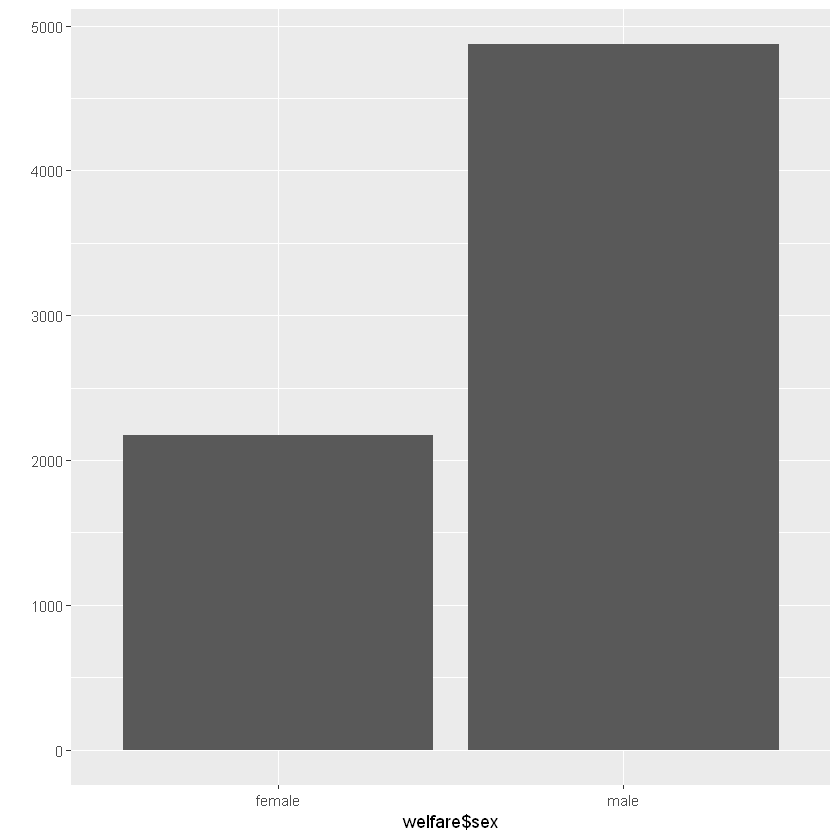

In [18]:
qplot(welfare$sex)

가구주의 성별인데 남성이 더 많은 이유는 한국은 가부장제 국가로 가구주들이 아직은 남성으로 되어있는 경우가 많기 때문임

---
### 2. 변수 검토 및 정제 - 소득
#### 2-1. 변수 검토, 수정

In [19]:
class(welfare$income)

[1] "numeric"

In [20]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -20516    1108    2404    3336    4642  108888 

평균 소득이 낮은 이유 : 1인 가구주, 미성년자 가구주, 고령층(80~90대) 가구주가 데이터에 많이 포함되어 있기 때문

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



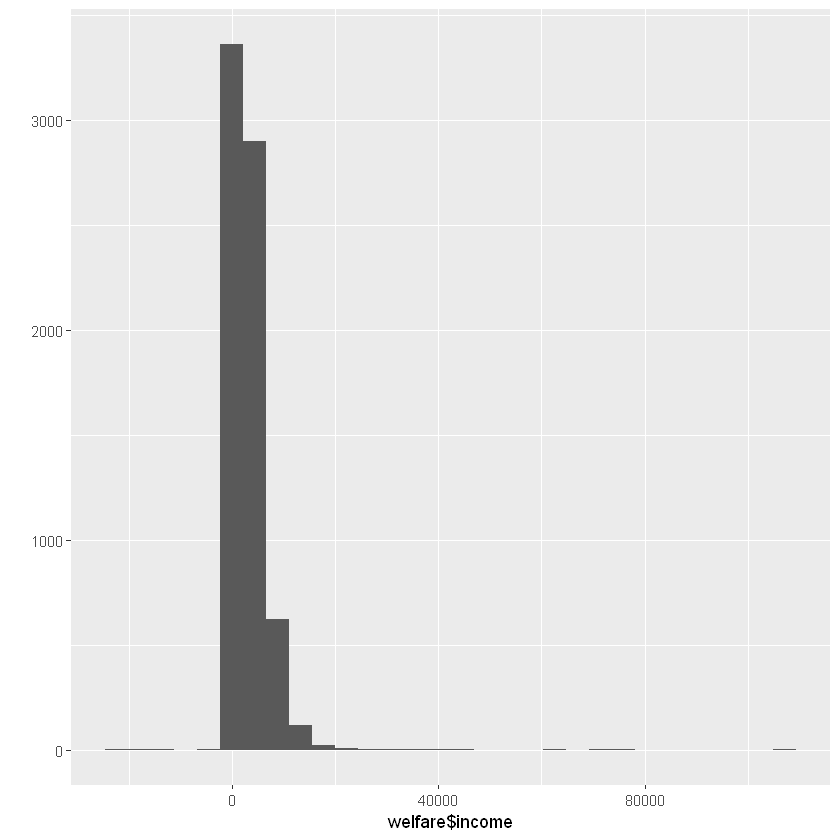

In [21]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 255 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


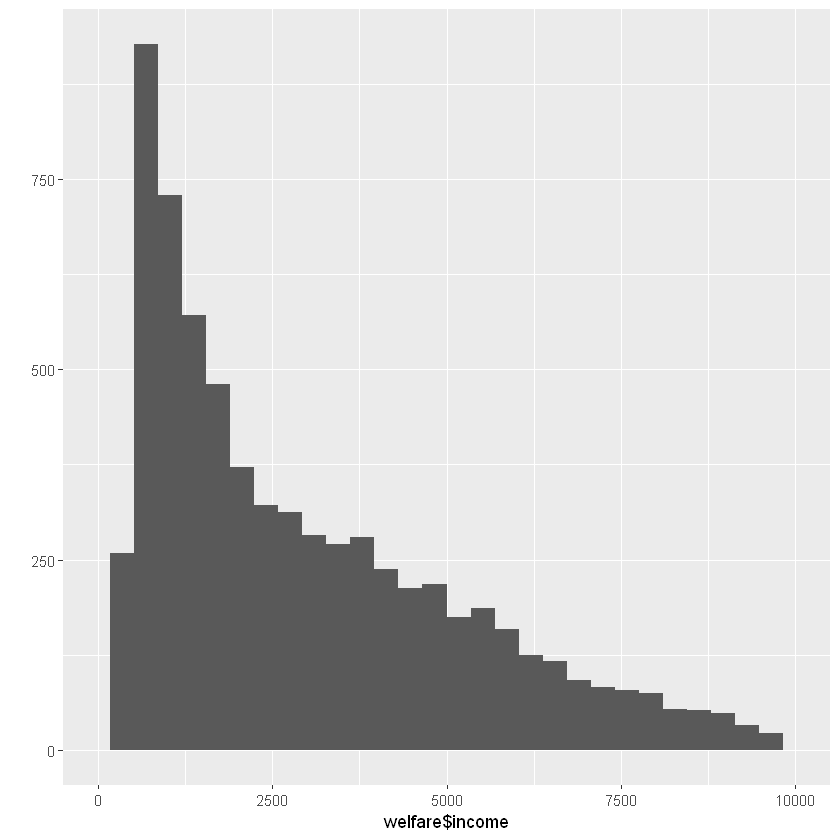

In [22]:
qplot(welfare$income) + xlim(0, 10000) # x축 설정

---
#### 2-2.정제 - 이상치 확인 및 결측처리
* 소득 이상치 : 모름/무응답 없음

In [23]:
table(is.na(welfare$income))


FALSE 
 7048 

---  
### 3. 성별 소득 평균 분석
#### 성별 소득 평균표 생성

In [24]:
sex_income <- welfare %>% 
    group_by(sex) %>% 
    summarise(mean_income = mean(income))
sex_income

`summarise()` ungrouping output (override with `.groups` argument)



sex,mean_income
<chr>,<dbl>
female,1581.255
male,4118.903


#### 그래프 생성

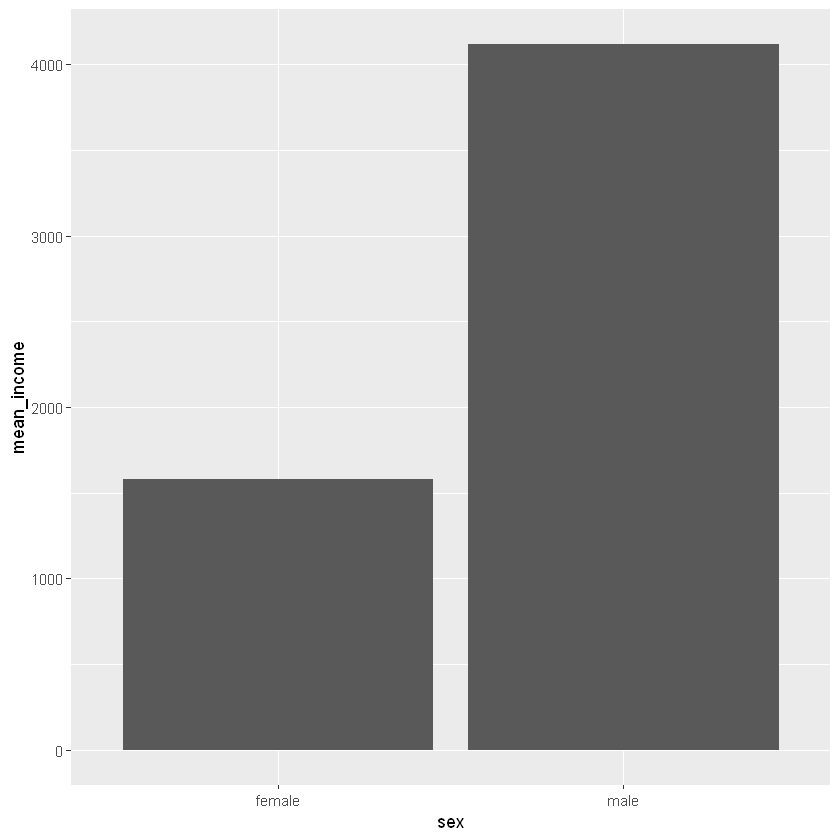

In [25]:
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

여성 혼자 아이를 키우는 가구도 포함될 수 있고, 가부장제에서 보통 아버지를 가구주로 두기 때문에 여성에 1인 가구가 더 많을 수 있음. 

---
## 분석2 : 나이와 소득의 관계

절차

1. 변수 검토 및 정제 - 나이
    * 1-1. 태어난 연도 변수 검토
    * 1-2. 정제 - 이상치 확인 및 결측처리
    * 1-3. 나이 변수 생성 : 태어난 연도만 가지고 있기 때문에 파생 변수를 만들어줌
    
    
2. 변수 검토 및 정제 - 소득
    * 앞에서 완료됨
    
    
3. 나이별 소득 평균 분석
    * 나이별 소득 평균표 생성
    * 그래프 생성

---
### 1. 변수 검토 및 정제 - 나이
#### 1-1. 태어난 연도 변수 검토

In [26]:
class(welfare$birth)

[1] "numeric"

In [27]:
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1918    1940    1952    1953    1966    2002 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



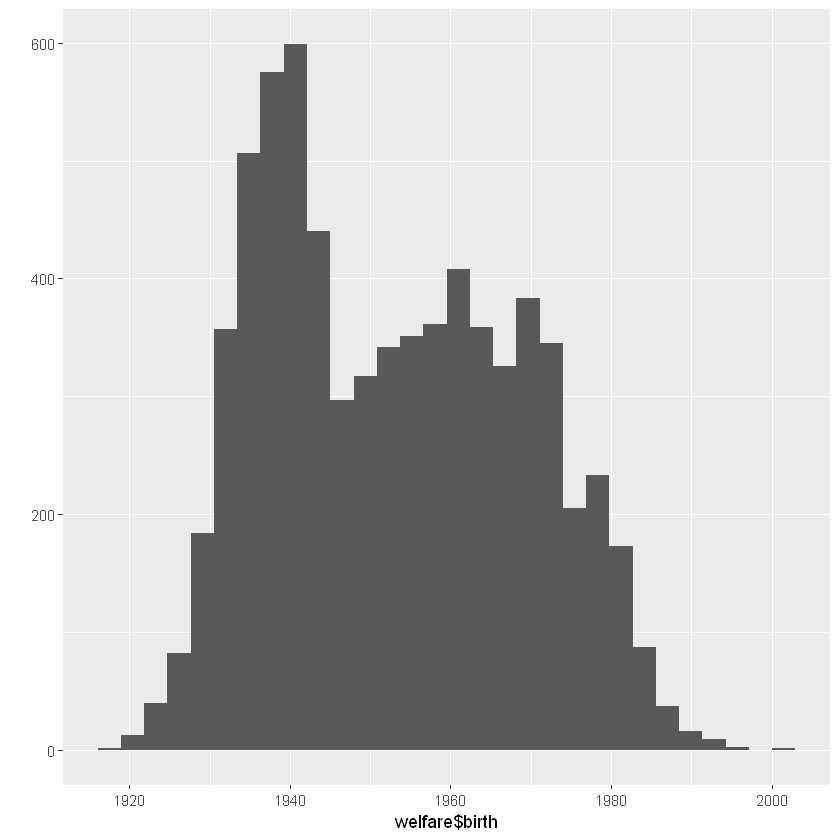

In [28]:
qplot(welfare$birth)

노년층의 특징을 반영하기 위한 조사였기 때문에 노년층의 데이터 수가 많음

---
#### 1-2. 정제 - 이상치 확인 및 결측처리
* 태어난 연도 이상치 : 모름 / 무응답 = 9999

In [29]:
# 이상치 확인
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1918    1940    1952    1953    1966    2002 

In [30]:
# 이상치 결측처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth)

In [31]:
# 결측치 확인
table(is.na(welfare$birth))


FALSE 
 7048 

---
#### 1-3. 나이 변수 생성 : 2014년 기준 한국식 나이

In [32]:
welfare$age <- 2014 - welfare$birth + 1
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   49.00   63.00   62.01   75.00   97.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



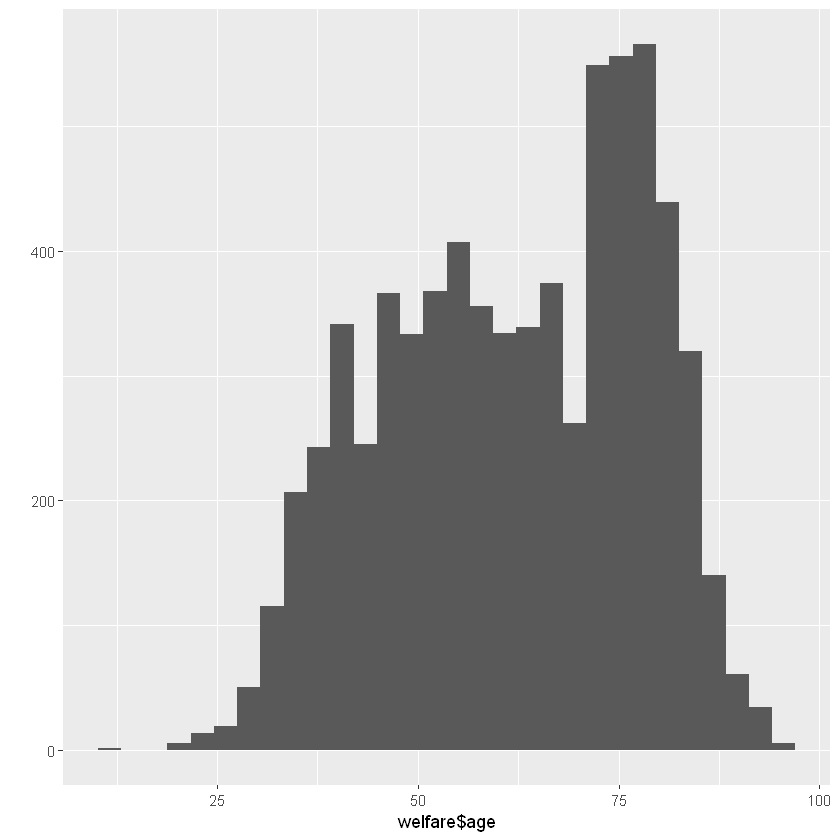

In [34]:
qplot(welfare$age)

---
### 2. 변수 검토 및 정제 - 소득
* 앞에서 완료됨

---
### 3. 나이별 소득 평균 분석
#### 나이별 소득 평균표 생성

In [35]:
age_income <- welfare %>% 
    group_by(age) %>%
    summarise(mean_income = mean(income))
age_income

`summarise()` ungrouping output (override with `.groups` argument)



age,mean_income
<dbl>,<dbl>
13,252.000
20,1094.900
21,2117.600
22,2656.000
23,1748.250
24,5429.600
25,2310.400
26,5273.371
27,3394.980


#### 그래프 생성 - 산점도

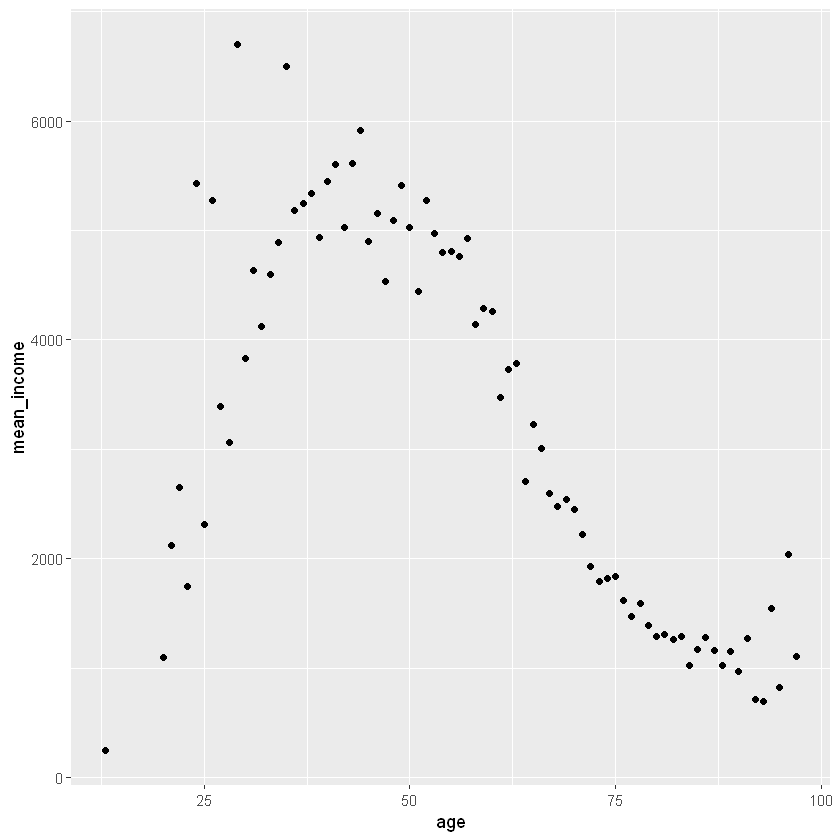

In [36]:
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_point()

나이별 대표성을 확보하기 위해서는 연령대별로 구간을 나눠주는 것이 더 좋음

---
## 분석3 : 연령대에 따른 소득

절차

1. 변수 검토 및 정제 - 연령대
    * 1-1. 연령대 변수 생성

    
2. 변수 검토 및 정제 - 소득
    * 앞에서 완료됨
    
    
3. 연령대별 소득 평균 분석
    * 연령대별 소득 평균표 생성
    * 그래프 생성

---
### 1. 변수 검토 및 정제 - 연령대
#### 1-1. 연령대 변수 생성
|범주|기준|
|:--:|:--:|
|초년|30세 미만|
|중년|30~59세|
|노년|60세 이상|

In [37]:
welfare <- welfare %>% 
    mutate(ageg = ifelse(age < 30, "young",
                        ifelse(age <= 59, "middle", "old")))

In [38]:
table(welfare$ageg)


middle    old  young 
  3004   3979     65 

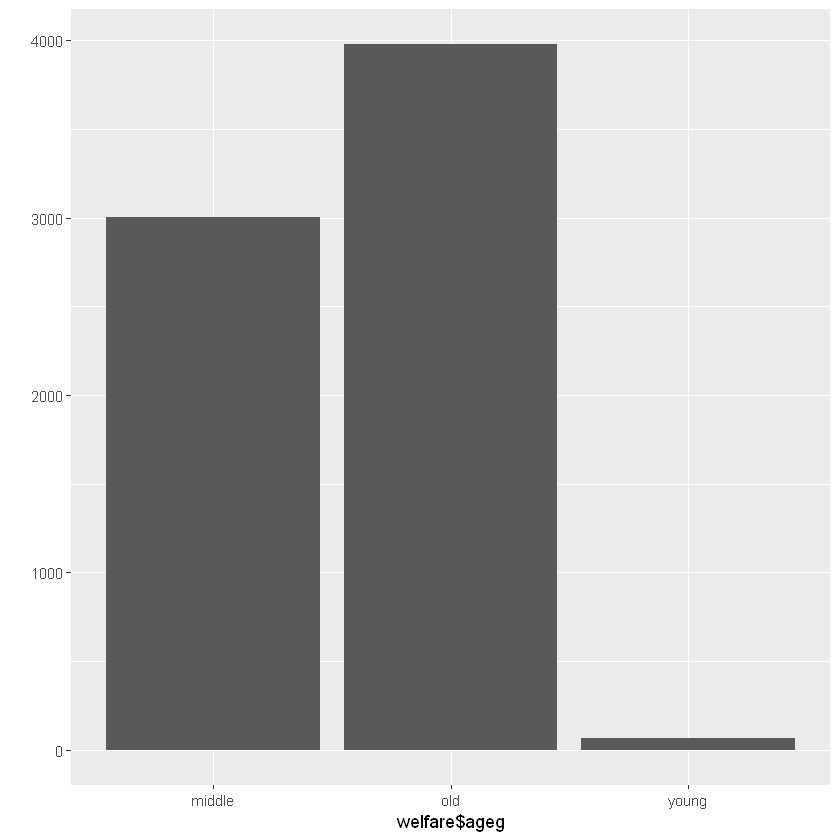

In [39]:
qplot(welfare$ageg)

---
### 2. 변수 검토 및 정제 - 소득
* 앞에서 완료됨

---
### 3. 연령대별 소득 평균 분석
#### 연령대별 소득 평균표 생성
* 초년 빈도 적으므로 제외

In [40]:
welfare_income <- welfare %>% 
    filter(ageg != "young") %>% 
    group_by(ageg)  %>% 
    summarise(mean_income = mean(income))
welfare_income

`summarise()` ungrouping output (override with `.groups` argument)



ageg,mean_income
<chr>,<dbl>
middle,5017.822
old,2049.348


#### 그래프 만들기

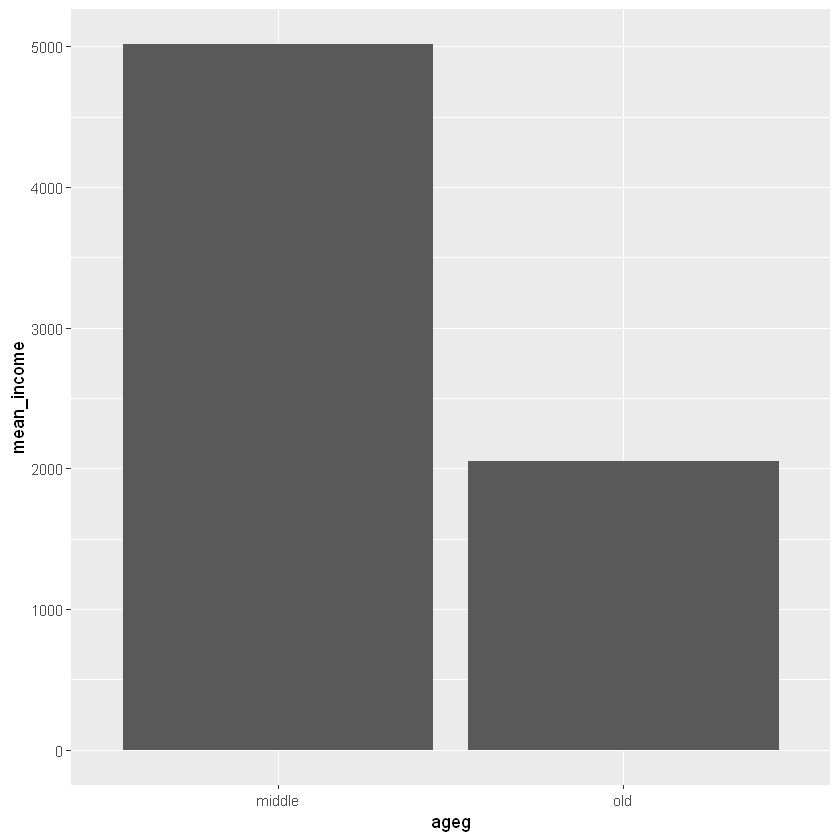

In [41]:
ggplot(data = welfare_income, aes(x = ageg, y = mean_income)) + geom_col()

---
## 분석4 : 연령대 및 성별에 따른 소득

절차

1. 연령대 및 성별 소득 평균표 생성


2. 그래프 만들기

---
### 1. 연령대 및 성별 소득 평균표 생성 
* 초년 제외

In [42]:
sex_income <- welfare %>% 
    filter(ageg != "young") %>% 
    group_by(ageg, sex) %>%  # 연령대별로 나눈 후, 성별로 나눔
    summarise(mean_income = mean(income))
sex_income

`summarise()` regrouping output by 'ageg' (override with `.groups` argument)



ageg,sex,mean_income
<chr>,<chr>,<dbl>
middle,female,2868.804
middle,male,5420.444
old,female,1179.192
old,male,2674.162


---
### 2. 그래프 만들기

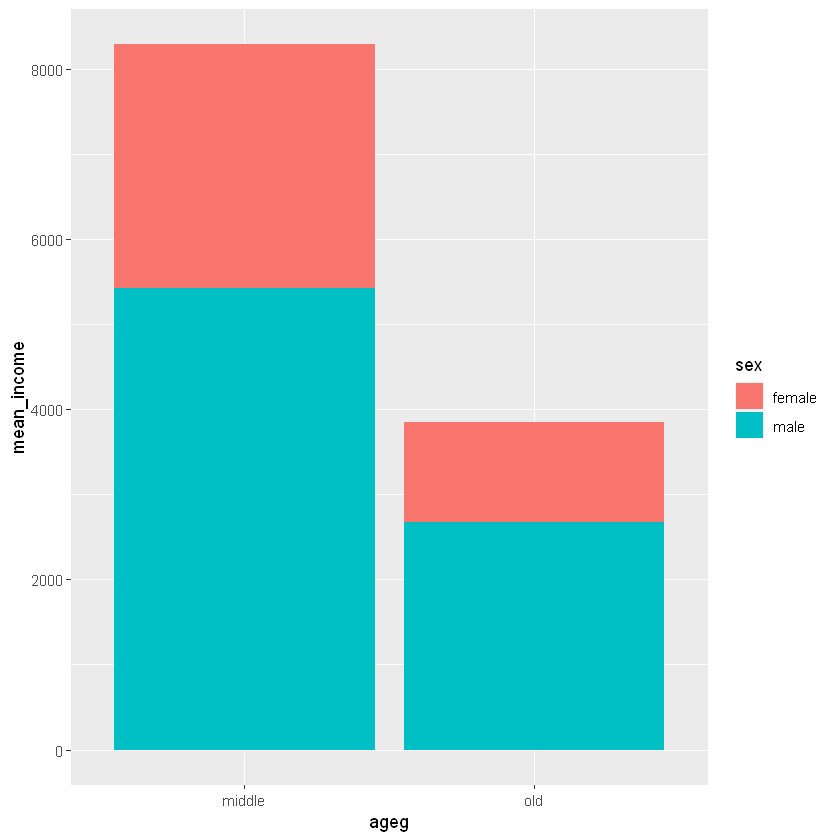

In [43]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) + geom_col() # fill 파라미터 값 별로 색을 칠해줌

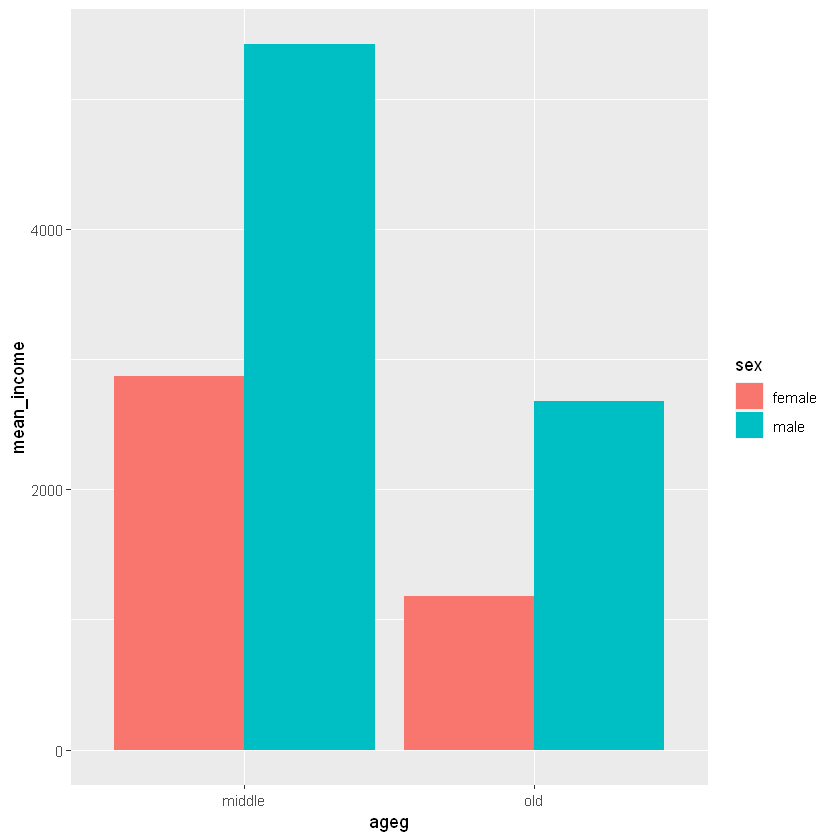

In [44]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) + geom_col(position = "dodge") # position 변경(기본값 = "stack")

누적 그래프 일 때보다 차이가 더 잘 들어옴